# Analysis of unstructured data

## Assignment 2

### Anna Szymanek 230042

Visit the “Publications” section of the Hugo Steinhaus Center website (http://prac.im.pwr.wroc.pl/~hugo/HSC/hsc.html). 

Scrape the data on research papers from that site and generate a cooperation network of authors in the following way:

1. members of HCS are the nodes,
2. the size of a node is proportional to the number of papers co-authored by the node,
3. a link between two nodes means a paper written together by the corresponding members,
4. a weight of the link indicates the total number of common papers.


Visualize the network (with names and link weights). Detect the connected components.


In [21]:
import requests
import networkx as nx
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from collections import Counter
from itertools import combinations
from unidecode import unidecode

Firstly, Iim scraping the data on publications from Hugo Stainhaus Center.
I use lxml to getting html.

In [23]:
unidecode("ć")

'c'

In [2]:
url = 'http://prac.im.pwr.wroc.pl/~hugo/HSC/Publications.html'
r = requests.get(url)
soup = BeautifulSoup(r.content,"lxml")   

The `<ol>` tag defines an ordered list. 

I'm taking only sections of research papers from 1995y to 2020y, so only `<ol>` from 2 to 28 are intresting to me.

The `<li>` tag is used to define each list item.

Each `<li>` consists of authors' names, year of publication, title, etc.

The `<b>` tag defined bold text, only bolded ones are from HSC.



In [27]:
authors = []
for ol in soup.findAll('ol', attrs={'type': "1"})[2:28]: 
    publications = ol.findAll('li')
    publications = list(set(publications)) # removing duplicates from the list of publications
    for publication in publications:   
        one_publ = []
        for item in publication.findAll('b'): 
            one_publ.append(item.text)
        authors.append(one_publ)

Below the authors of the first 10 works.

In [4]:
print(authors[:10])

[['K.Maraj', 'G.Sikora', 'A.Wyłomańska'], ['A.Wyłomańska'], ['M.Muszkieta', 'J.Janczura', 'A.Weron'], ['A.Wyłomańska'], ['M.Balcerek', 'K.Burnecki'], ['M.Balcerek', 'K.Burnecki'], ['A.Grzesiek', 'A.Wylomanska'], ['J.Gruszka', 'J.Szwabiński'], ['A.Grzesiek', 'A.Wyłomańska'], ['A.Grzesiek', 'G.Sikora', 'M.Teuerle', 'A.Wyłomańska']]


Becouse some authors have polish characters in theirs names. I change polish characters.
I need also convert non-ascii characters, removing whitespaces and removing second surname if appears.

In [24]:
authors_new = []
for one_publ in authors:
    one_publ_new = []
    for item in one_publ:
        item_new = unidecode(item)   #removing non ascii characters
        item_new = item_new.replace(' ', '')   #removing spaces
        item_new = item_new.split('-')[0]   #removing second surname if appears
        one_publ_new.append(item_new)
    if one_publ_new:
        authors_new.append(one_publ_new)

Below the authors of the first 10 works.

In [25]:
print(authors_new[0:10])

[['K.Maraj', 'G.Sikora', 'A.Wylomanska'], ['A.Wylomanska'], ['M.Muszkieta', 'J.Janczura', 'A.Weron'], ['A.Wylomanska'], ['M.Balcerek', 'K.Burnecki'], ['M.Balcerek', 'K.Burnecki'], ['A.Grzesiek', 'A.Wylomanska'], ['J.Gruszka', 'J.Szwabinski'], ['A.Grzesiek', 'A.Wylomanska'], ['A.Grzesiek', 'G.Sikora', 'M.Teuerle', 'A.Wylomanska']]


To know how many pubications each person wrote, I create a dictionary.

In [8]:
authors_counter = dict(Counter([item for sublist in authors_new for item in sublist]))  

How many people from HSC published a paper?

In [9]:
len(authors_counter) 

63

I create graph using NetworkX.

In [10]:
G = nx.Graph()

Edges are list of possible combinations of co-authors within one publication. 

If edge exists I adding weight to the edge, otherwise I creating edge between co-authors or if there is a single author, creating node for them (if it does not exist yet).




In [11]:
for one_publ in authors_new:
    if len(one_publ) > 1: 
        edges = list(combinations(one_publ, 2))   

        for i,j in edges:  
            if (i,j) in G.edges() or (j,i) in G.edges():   
                G[i][j]['weight'] += 1    
            else:
                G.add_edge(i, j, weight = 1) 

    elif one_publ[0] not in G.nodes():  
        G.add_node(one_publ[0])

Size of node depending on number of written publications.

In [12]:
sizes = [authors_counter[name]*25 for name in list(G.nodes)]   

Below the list of authors.

In [29]:
print(G.nodes)

['K.Maraj', 'G.Sikora', 'A.Wylomanska', 'M.Muszkieta', 'J.Janczura', 'A.Weron', 'M.Balcerek', 'K.Burnecki', 'A.Grzesiek', 'J.Gruszka', 'J.Szwabinski', 'M.Teuerle', 'J.Hebda', 'P.Kowalek', 'H.Loch', 'P.Kruczek', 'G.Krzyzanowski', 'M.Magdziarz', 'L.Plociniczak', 'L.Bielak', 'A.Stanislavsky', 'W.Nitka', 'M.Malek', 'A.Stanislawsky', 'Z.Palmowski', 'A.Wilkowska', 'A.Kumar', 'R.Poloczanski', 'T.Zorawik', 'A.Michalak', 'J.Slezak', 'G.Zak', 'D.Kucharczyk', 'A.Fulinski', 'J.Gajda', 'J.Sokolowski', 'J.Goncerzewicz', 'J.Obuchowski', 'W.Okrasinski', 'R.Weron', 'S.Orzel', 'W.Mydlarczyk', 'A.Jurlewicz', 'J.Iwanik', 'E.Broszkiewicz', 'J.Nowicka', 'A.Misiorek', 'M.Borgosz', 'Z.Michna', 'P.Mista', 'M.Kozlowski', 'T.Piesiewicz', 'A.Makagon', 'P.Wilman', 'G.Kukla', 'S.Ondruszko', 'B.Stawiarski', 'B.Kozlowska', 'M.Kotulski', 'B.Przybylowicz', 'S.Staskiewicz', 'A.Janicki', 'P.Sztuba']


List of authors sorted by the number of publications in descending order.

In [14]:
for w in sorted(authors_counter, key=authors_counter.get, reverse=True):   # how many publications written (in decreasing order)
    print(w, authors_counter[w])

A.Wylomanska 140
A.Weron 89
R.Weron 83
K.Burnecki 77
M.Magdziarz 68
A.Jurlewicz 34
G.Sikora 30
J.Janczura 29
Z.Palmowski 27
J.Nowicka 23
J.Gajda 21
M.Teuerle 20
L.Plociniczak 20
J.Obuchowski 18
A.Misiorek 16
P.Kruczek 11
A.Grzesiek 10
G.Zak 10
J.Szwabinski 9
W.Okrasinski 9
E.Broszkiewicz 9
M.Borgosz 9
H.Loch 8
T.Zorawik 8
J.Slezak 8
Z.Michna 8
M.Balcerek 7
S.Orzel 6
M.Muszkieta 5
R.Poloczanski 5
P.Mista 5
M.Kotulski 5
A.Janicki 5
M.Kozlowski 4
G.Kukla 4
J.Hebda 3
L.Bielak 3
A.Stanislavsky 3
A.Stanislawsky 3
K.Maraj 2
P.Kowalek 2
G.Krzyzanowski 2
D.Kucharczyk 2
J.Iwanik 2
T.Piesiewicz 2
P.Sztuba 2
J.Gruszka 1
W.Nitka 1
M.Malek 1
A.Wilkowska 1
A.Kumar 1
A.Michalak 1
A.Fulinski 1
J.Sokolowski 1
J.Goncerzewicz 1
W.Mydlarczyk 1
A.Makagon 1
P.Wilman 1
S.Ondruszko 1
B.Stawiarski 1
B.Kozlowska 1
B.Przybylowicz 1
S.Staskiewicz 1


The most popular author is A.Wylomanska, she wrote 140 articles.

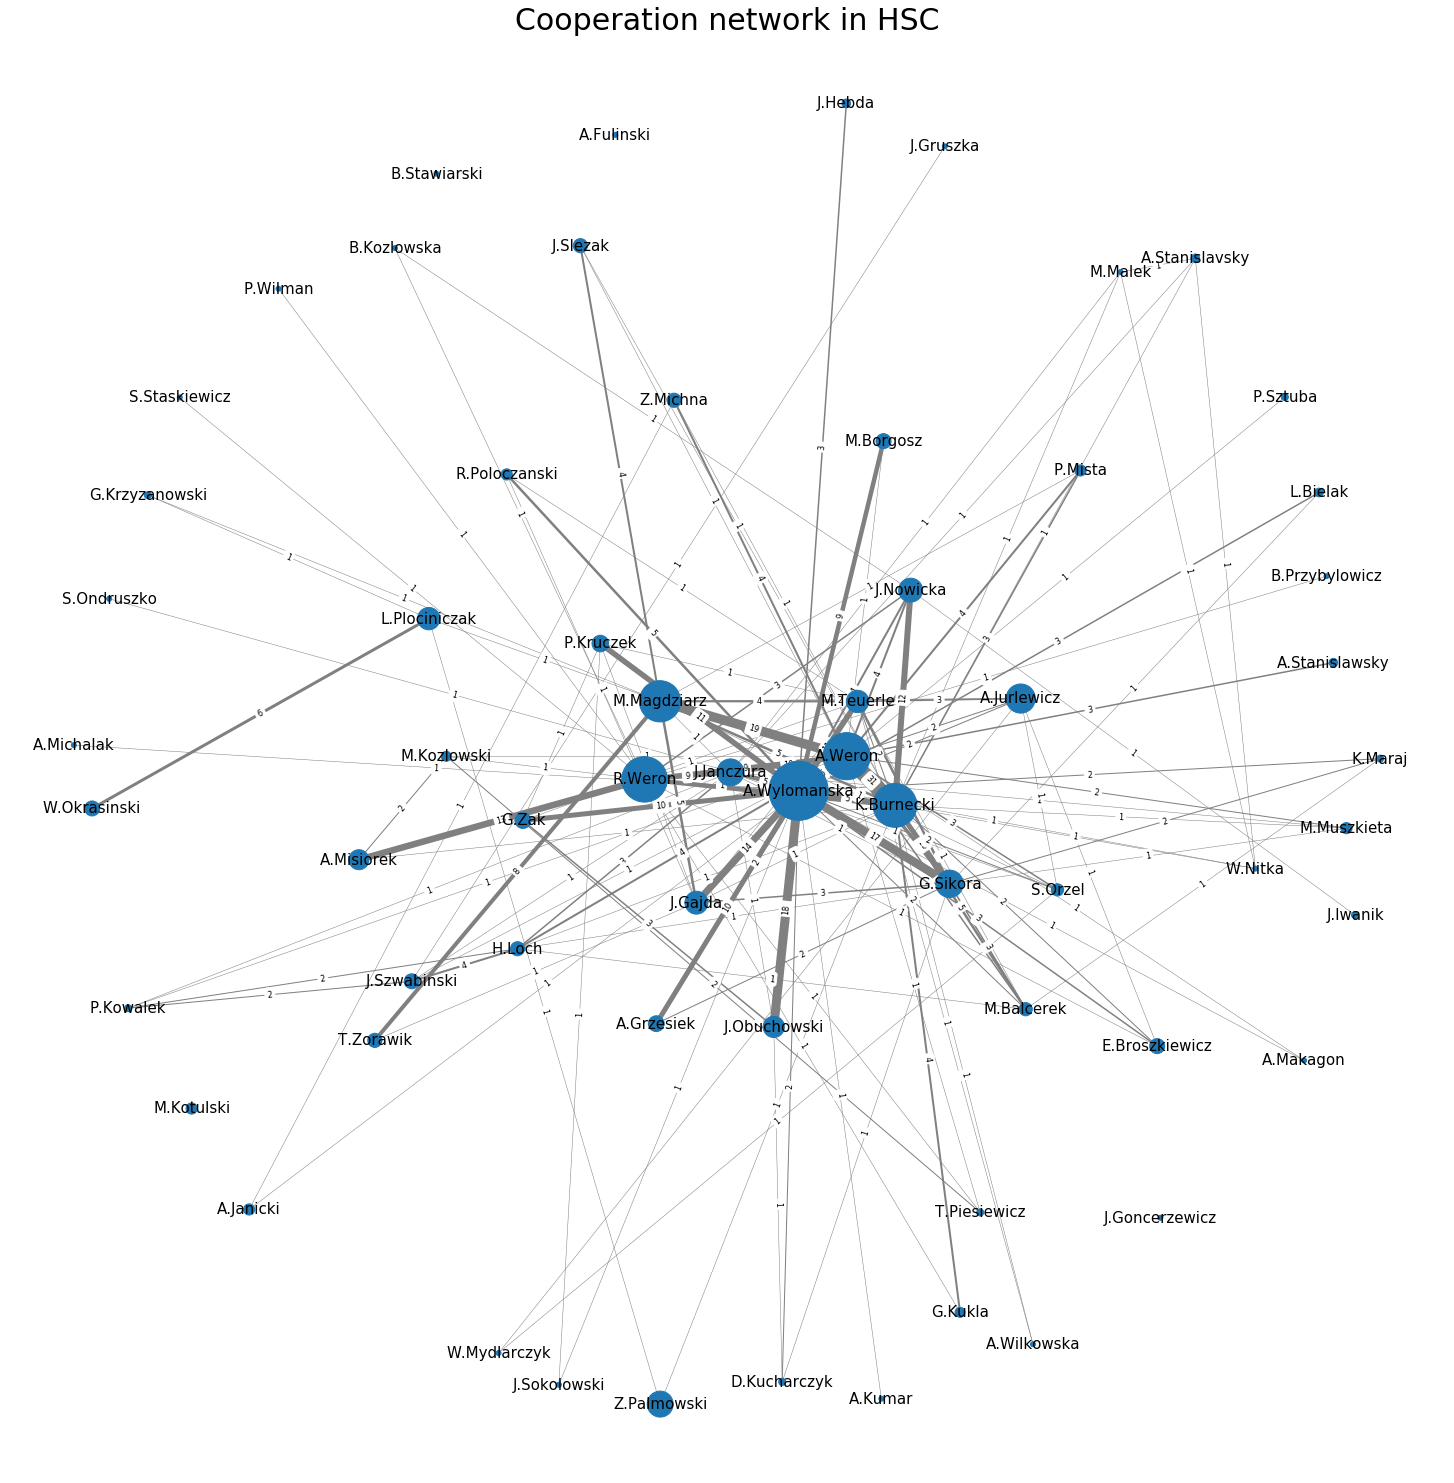

In [15]:
plt.figure(figsize = (20,20)) 
pos = nx.spring_layout(G, k = 2.3, iterations = 100)
edge_width = [G[i][j]['weight']/2 for i,j in G.edges()]
nx.draw(G, pos, node_size = sizes, with_labels = True, font_size=15, edge_color='gray', width=edge_width)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = labels, font_size = 8)
plt.title("Cooperation network in HSC", fontdict = {'fontsize' : 30})
plt.show()

The average number the articles for author?

In [63]:
G.size()/G.order()

2.3333333333333335

I can see people not publishing in collaboration with others. How many people from HSC published a papers alone?

In [16]:
nx.number_of_isolates(G) 

4

Who is this?

In [17]:
[*nx.isolates(G)] 

['A.Fulinski', 'J.Goncerzewicz', 'B.Stawiarski', 'M.Kotulski']

I compute betweenes centality:

In [101]:
# Betweenness centrality
bet_cen = nx.betweenness_centrality(G)
# Closeness centrality
clo_cen = dict(nx.closeness_centrality(G))


In [99]:
for w in sorted(clo_cen, key=clo_cen.get, reverse=True):   # how many publications written (in decreasing order)
    print(w, clo_cen[w])

A.Weron 0.5897615708274895
A.Wylomanska 0.577213452299245
K.Burnecki 0.5593614898570003
J.Janczura 0.526777325399311
R.Weron 0.4977804084048535
G.Sikora 0.47594793435200905
J.Nowicka 0.463744141163496
M.Magdziarz 0.4598141060688901
M.Teuerle 0.45595012198427753
M.Balcerek 0.4484137563316449
S.Orzel 0.4484137563316449
A.Jurlewicz 0.44473823373876253
J.Gajda 0.43756503642039535
E.Broszkiewicz 0.43756503642039535
H.Loch 0.42389112903225806
M.Muszkieta 0.4110459433040078
M.Borgosz 0.407955372301722
A.Makagon 0.407955372301722
J.Slezak 0.40491092922484345
P.Mista 0.40491092922484345
J.Obuchowski 0.39895635673624286
Z.Michna 0.3931743805516596
J.Szwabinski 0.38755760368663594
M.Kozlowski 0.38755760368663594
P.Kowalek 0.38480896819949667
P.Kruczek 0.38480896819949667
T.Piesiewicz 0.38480896819949667
A.Grzesiek 0.3820990458882326
R.Poloczanski 0.37942702458831484
G.Zak 0.37942702458831484
A.Stanislavsky 0.3741935483870968
W.Nitka 0.3741935483870968
M.Malek 0.3741935483870968
A.Misiorek 0.37419

In [102]:
for w in sorted(bet_cen, key=bet_cen.get, reverse=True):   # how many publications written (in decreasing order)
    print(w, bet_cen[w])

A.Wylomanska 0.2985392215164822
A.Weron 0.24275213739782744
K.Burnecki 0.1844379810799695
R.Weron 0.13420861558090538
M.Magdziarz 0.10288187927003371
J.Janczura 0.08563522088112255
J.Nowicka 0.04117582869565947
G.Sikora 0.03636189740103013
M.Teuerle 0.03349279473684551
L.Plociniczak 0.03142957870615195
J.Szwabinski 0.030142781597038603
J.Gajda 0.021904380947215436
A.Jurlewicz 0.01917567566695013
S.Orzel 0.01755699350887082
Z.Palmowski 0.0076187957996524894
M.Balcerek 0.0057981577151328565
H.Loch 0.005631650211237732
J.Obuchowski 0.002498403529603953
P.Kruczek 0.001988953522533639
Z.Michna 0.001811840547959004
M.Kozlowski 0.0015996827075621363
E.Broszkiewicz 0.001428760293117776
A.Misiorek 0.000980416845038738
G.Zak 0.0006610259122157589
D.Kucharczyk 0.00017627357659086903
K.Maraj 0.0
M.Muszkieta 0.0
A.Grzesiek 0.0
J.Gruszka 0.0
J.Hebda 0.0
P.Kowalek 0.0
G.Krzyzanowski 0.0
L.Bielak 0.0
A.Stanislavsky 0.0
W.Nitka 0.0
M.Malek 0.0
A.Stanislawsky 0.0
A.Wilkowska 0.0
A.Kumar 0.0
R.Poloczansk

Does the graph have bridges?

In [67]:
nx.has_bridges(G)

True

The list of co-authors which are bridge:

In [72]:
list(nx.bridges(G))

[('A.Wylomanska', 'J.Hebda'),
 ('A.Wylomanska', 'A.Kumar'),
 ('A.Wylomanska', 'A.Michalak'),
 ('A.Wylomanska', 'S.Ondruszko'),
 ('A.Weron', 'A.Stanislawsky'),
 ('A.Weron', 'P.Sztuba'),
 ('J.Gruszka', 'J.Szwabinski'),
 ('L.Plociniczak', 'W.Okrasinski'),
 ('R.Weron', 'P.Wilman'),
 ('R.Weron', 'B.Przybylowicz'),
 ('R.Weron', 'S.Staskiewicz'),
 ('J.Iwanik', 'J.Nowicka')]